In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, fixed

In [45]:
data = pd.read_csv("DJIAdata/dow_jones_index.data")

In [46]:
data.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                  float64
high                                  float64
low                                   float64
close                                 float64
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                       float64
next_weeks_close                      float64
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

In [47]:
data.describe

<bound method NDFrame.describe of      quarter stock       date   open   high    low  close     volume  \
0          1    AA   1/7/2011  15.82  16.72  15.78  16.42  239655616   
1          1    AA  1/14/2011  16.71  16.71  15.64  15.97  242963398   
2          1    AA  1/21/2011  16.19  16.38  15.60  15.79  138428495   
3          1    AA  1/28/2011  15.87  16.63  15.82  16.13  151379173   
4          1    AA   2/4/2011  16.18  17.39  16.18  17.14  154387761   
5          1    AA  2/11/2011  17.33  17.48  16.97  17.37  114691279   
6          1    AA  2/18/2011  17.39  17.68  17.28  17.28   80023895   
7          1    AA  2/25/2011  16.98  17.15  15.96  16.68  132981863   
8          1    AA   3/4/2011  16.81  16.94  16.13  16.58  109493077   
9          1    AA  3/11/2011  16.58  16.75  15.42  16.03  114332562   
10         1    AA  3/18/2011  15.95  16.33  15.43  16.11  130374108   
11         1    AA  3/25/2011  16.38  17.24  16.26  17.09   95550392   
12         1   AXP   1/7/2011 

In [48]:
data = data[["quarter", "stock", "date", "open", "high", "low", "close", "volume", "percent_change_price", "percent_change_volume_over_last_wk"]].fillna(0)

In [49]:
basic_materials = ["AA", "DD"]
financial_services = ["AXP","BAC", "JPM", "TRV"]
industrials = ["BA", "CAT", "GE", "MMM", "UTX"]
technology = ["CSCO", "HPQ", "IBM", "INTC", "MSFT"]
energy = ["CVX", "XOM"]
consumer_cyclical = ["DIS", "HD", "MCD"]
healthcare = ["JNJ", "MRK", "PFE"]
consumer_defensive = ["KHC", "KO", "PG", "WMT"]
communication_services = ["T", "VZ"]

data.loc[data['stock'].isin(basic_materials), 
             'stock_sector'] = 'Basic Materials'
data.loc[data['stock'].isin(financial_services), 
             'stock_sector'] = 'Financial Services'
data.loc[data['stock'].isin(industrials), 
             'stock_sector'] = 'Industrials'
data.loc[data['stock'].isin(technology), 
             'stock_sector'] = 'Technology'
data.loc[data['stock'].isin(energy), 
             'stock_sector'] = 'Energy'
data.loc[data['stock'].isin(consumer_cyclical), 
             'stock_sector'] = 'Consumer Cyclical'
data.loc[data['stock'].isin(healthcare), 
             'stock_sector'] = 'Healthcare'
data.loc[data['stock'].isin(consumer_defensive), 
             'stock_sector'] = 'Consumer Defensive'
data.loc[data['stock'].isin(communication_services), 
             'stock_sector'] = 'Communication Services'

In [50]:
all = ["AA", "DD", "AXP","BAC", "JPM", "TRV", "BA", "CAT", "GE", "MMM", "UTX", "CSCO", "HPQ", "IBM", "INTC", "MSFT", "CVX", "XOM", "DIS", "HD", "MCD", "JNJ", "MRK", "PFE", "KHC", "KO", "PG", "WMT", "T", "VZ"]

data.loc[data['stock'].isin(all), 
        'all'] = 'All'

In [51]:
data["range"] = data["high"] - data["low"]

In [55]:
data.head(50)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,stock_sector,all,range
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.792670,0.000000,Basic Materials,All,0.94
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,Basic Materials,All,1.07
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,Basic Materials,All,0.78
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,Basic Materials,All,0.81
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,Basic Materials,All,1.21
5,1,AA,2/11/2011,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,Basic Materials,All,0.51
6,1,AA,2/18/2011,17.39,17.68,17.28,17.28,80023895,-0.632547,-30.226696,Basic Materials,All,0.40
7,1,AA,2/25/2011,16.98,17.15,15.96,16.68,132981863,-1.766780,66.177694,Basic Materials,All,1.19
8,1,AA,3/4/2011,16.81,16.94,16.13,16.58,109493077,-1.368230,-17.663150,Basic Materials,All,0.81
9,1,AA,3/11/2011,16.58,16.75,15.42,16.03,114332562,-3.317250,4.419900,Basic Materials,All,1.33


In [24]:
def pivot_count(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [25]:
def heatmap_count_types(df, col1, col2):
    pivot_table = pivot_count(df,col1, col2, "percent_change_price")
    sns.heatmap(pivot_table, annot=True, fmt='g')
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.show()

In [56]:
interact(heatmap_count_types, col1=data.columns.drop(["date"]),
                                 col2=data.columns.drop(["date"]),
                                 df=fixed(data));

interactive(children=(Dropdown(description='col1', options=('quarter', 'stock', 'open', 'high', 'low', 'close'…

In [58]:
def heatmap_count_types(df, col1, col2):
    pivot_table = pivot_count(df,col1, col2, "range")
    sns.heatmap(pivot_table, annot=True, fmt='g')
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.show()

In [57]:
interact(heatmap_count_types, col1=data.columns.drop(["date"]),
                                 col2=data.columns.drop(["date"]),
                                 df=fixed(data));

interactive(children=(Dropdown(description='col1', options=('quarter', 'stock', 'open', 'high', 'low', 'close'…

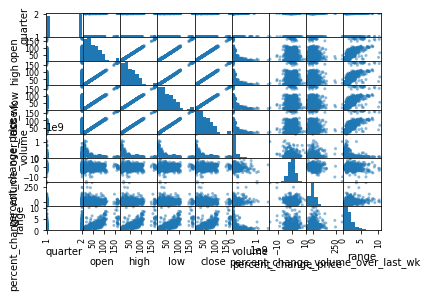

In [59]:
pd.plotting.scatter_matrix(data.select_dtypes([int, float]));